In [22]:
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [23]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


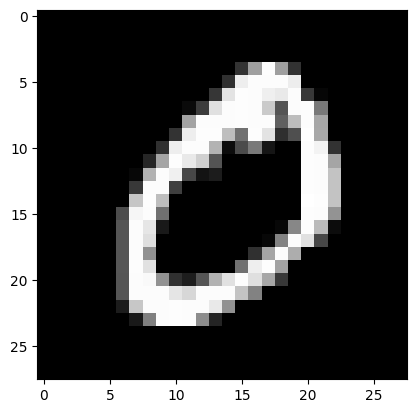

In [24]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [25]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [26]:
X_train, X_test = X_train/255, X_test/255 #minmaxscaler

In [27]:
print(X_train.shape, X_test.shape)
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [28]:
model = MLPClassifier(hidden_layer_sizes = (10,10), activation = "relu", solver = "adam", learning_rate_init=0.01, max_iter=10, batch_size=32)
model.fit(X_train, y_train)

c:\Users\pujan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=(10, 10),
              learning_rate_init=0.01, max_iter=10)

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))


0.9051


In [31]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense

In [33]:
w, h = X_test.shape[1], X_test.shape[2]

X_train = X_train.reshape(-1,w,h,1)
X_test = X_test.reshape(-1,w,h,1)

X_train, X_test = X_train/255, X_test/255

In [34]:
model = Sequential()

model.add(Conv2D(32, (3,3),activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(metrics=["accuracy"], optimizer = "adam",loss = "sparse_categorical_crossentropy")
model.fit(X_train, y_train, epochs = 5, batch_size = 32)


c:\Users\pujan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8529 - loss: 0.4391
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9789 - loss: 0.0670
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9860 - loss: 0.0474
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9885 - loss: 0.0362
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9913 - loss: 0.0303


In [35]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9863 - loss: 0.0402


[0.030732043087482452, 0.9902999997138977]

In [36]:
model.save("digits.h5")

In [37]:
saved_model = tf.keras.models.load_model("digits.h5")